<a href="https://colab.research.google.com/github/Skeo220/UCI-Machine-Learning-Repository/blob/main/Bank_Marketing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
!pip3 install -U ucimlrepo

In [286]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [287]:
# importing the dataset
bank_data = fetch_ucirepo(name='Bank Marketing')
features = bank_data.data.features
target = bank_data.data.targets

In [341]:
print(f'features shape:',features.shape)
print(f'target shape:',target.shape)

features shape: (45211, 16)
target shape: (45211, 1)


In [289]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [290]:
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day_of_week,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [291]:
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


# Univariate Analysis

In [292]:
# Numerical variables
num_vars = features.select_dtypes(include='int64')

In [293]:
def plot_num_var(data, col, histogram_bins=10):
    """
    Plots a histogram, a kernel density estimate (KDE) plot, and a box plot for a specified numerical column in a DataFrame.

    This function is designed to give a comprehensive overview of the distribution of a numerical variable. It creates three plots:
    1. A histogram showing the frequency distribution of the variable.
    2. A KDE plot illustrating the data density.
    3. A box plot providing insights into the variable's quartiles and outliers.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    col (str): The name of the numerical column to plot.
    histogram_bins (int): The number of bins to use in the histogram. Default is 10.

    Each plot is colored in sky blue for consistency, and the layout is adjusted for clear visibility.
    """
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[col], bins=histogram_bins, kde=False, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # KDE plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(data[col], color='skyblue', fill=True)
    plt.title(f'KDE of {col}')
    plt.xlabel('Values')
    plt.ylabel('Density')

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Value')

    plt.tight_layout()
    plt.show()

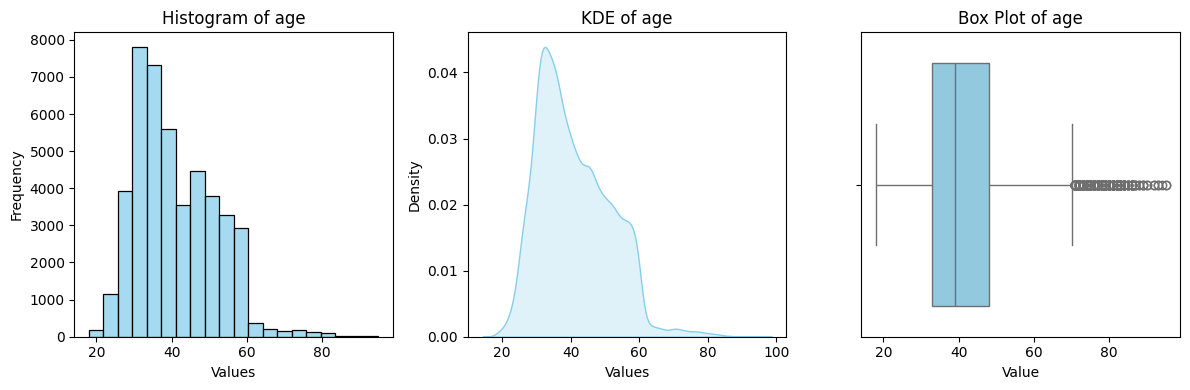

In [294]:
plot_num_var(num_vars, 'age', histogram_bins=20)

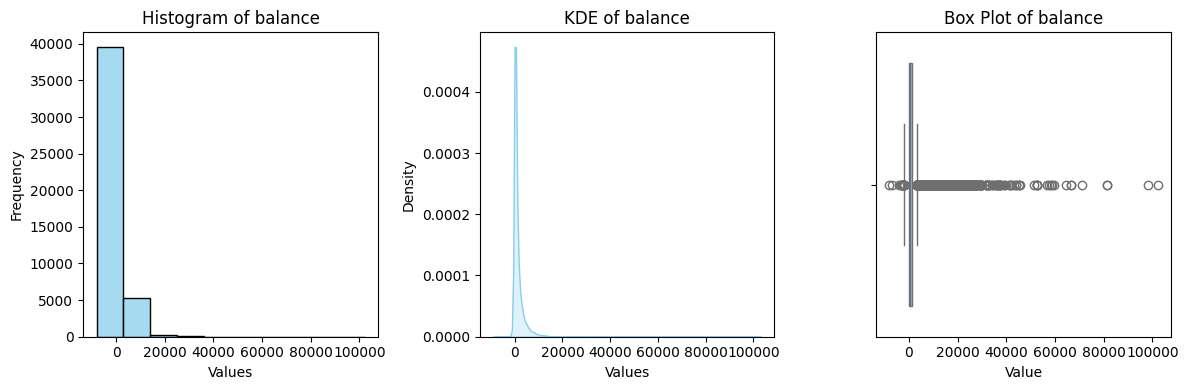

In [295]:
plot_num_var(num_vars, 'balance')

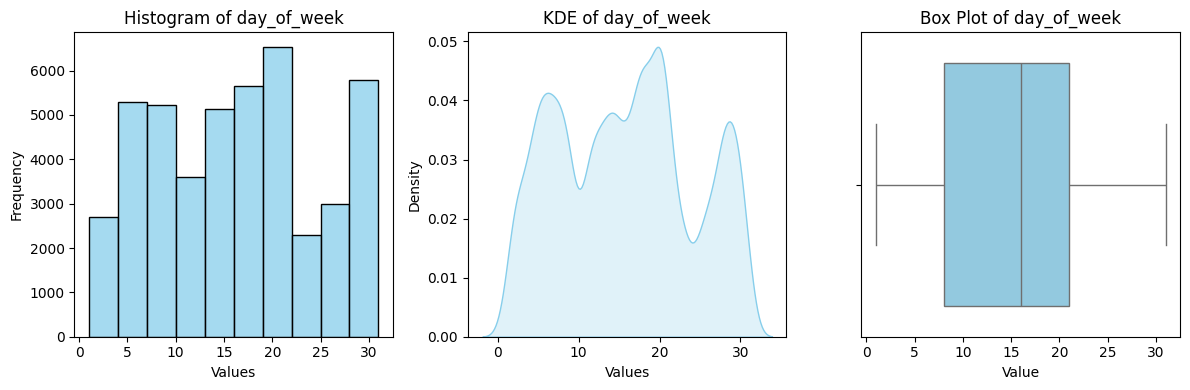

In [296]:
plot_num_var(num_vars, 'day_of_week')

This should be renamed to day of the month because it represents the last day of the month on which the customer was contacted

In [337]:
features.rename(columns={'day_of_week':'day_of_month'}, inplace=True)
num_vars.rename(columns={'day_of_week':'day_of_month'}, inplace=True)

<ipython-input-337-476be9537dc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.rename(columns={'day_of_week':'day_of_month'}, inplace=True)


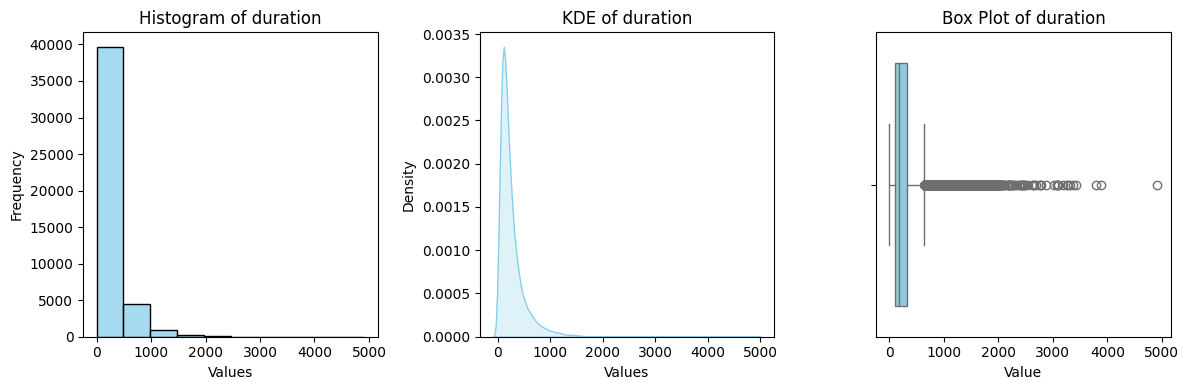

In [298]:
plot_num_var(num_vars, 'duration')

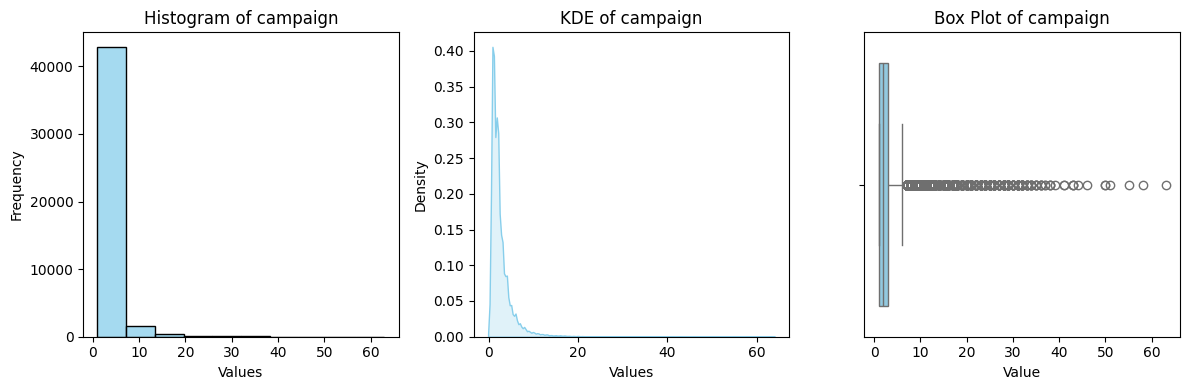

In [299]:
plot_num_var(num_vars, 'campaign')

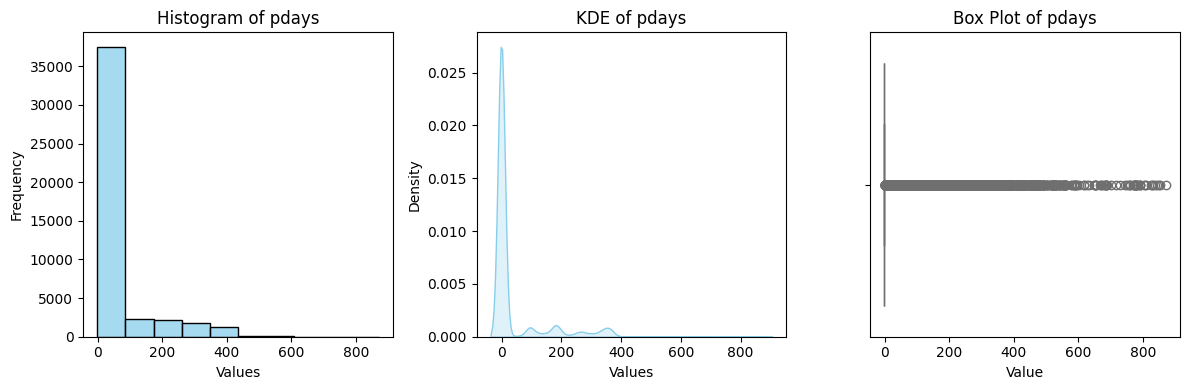

In [300]:
plot_num_var(num_vars, 'pdays')

There is a negative value here.
-1 means client was not previously contacted

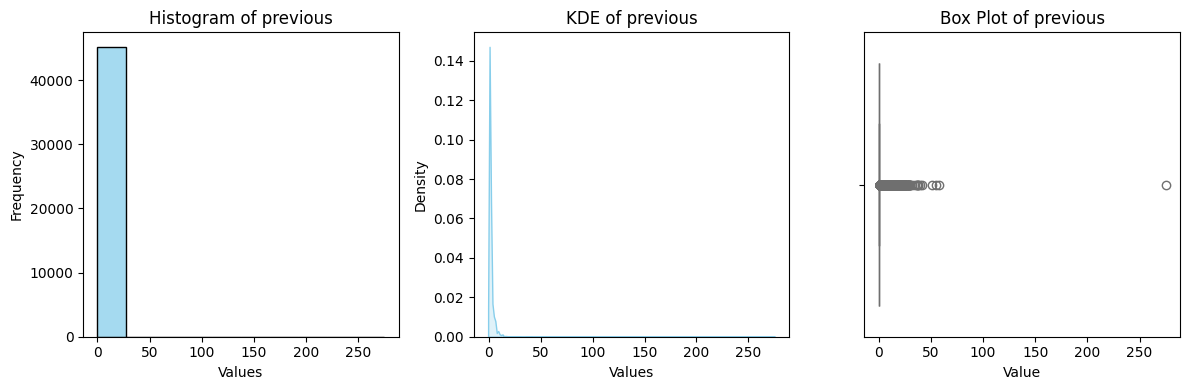

In [301]:
plot_num_var(num_vars, 'previous')

None of the variables follow a normal distribution and the majority are skewed to the right.

In [302]:
# Categorical variables
cat_vars = features.select_dtypes(include='object')

In [303]:
def plot_bar_chart(data, col):
    """
    Plots a bar chart for a specified column in a DataFrame.

    This function takes a DataFrame and a column name as input and
    plots a bar chart showing the distribution of values in that column.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    col (str): The name of the column to plot.

    The bar chart displays the frequency of each unique value in the column.
    The bars are colored in sky blue, and the x-ticks are rotated for better readability.
    """
    values, count = data[col].value_counts().index, data[col].value_counts().values

    plt.figure(figsize=(10, 6))
    plt.bar(values, count, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bar Chart of the {col} Variable')
    plt.show()

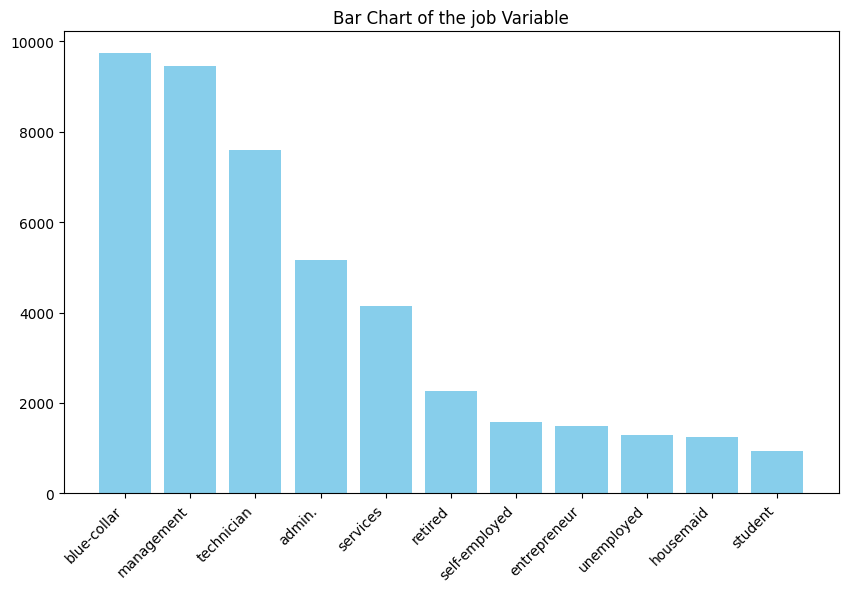

In [304]:
plot_bar_chart(cat_vars, 'job')

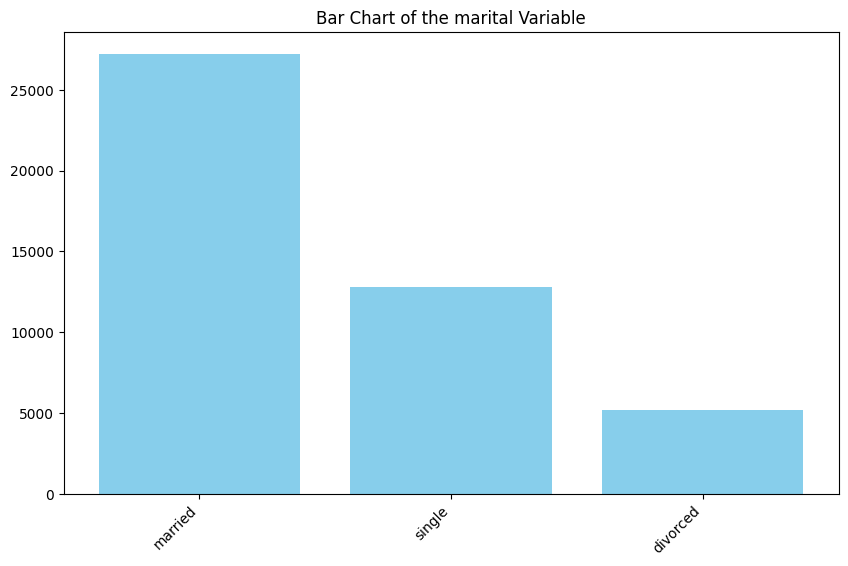

In [305]:
plot_bar_chart(cat_vars, 'marital')

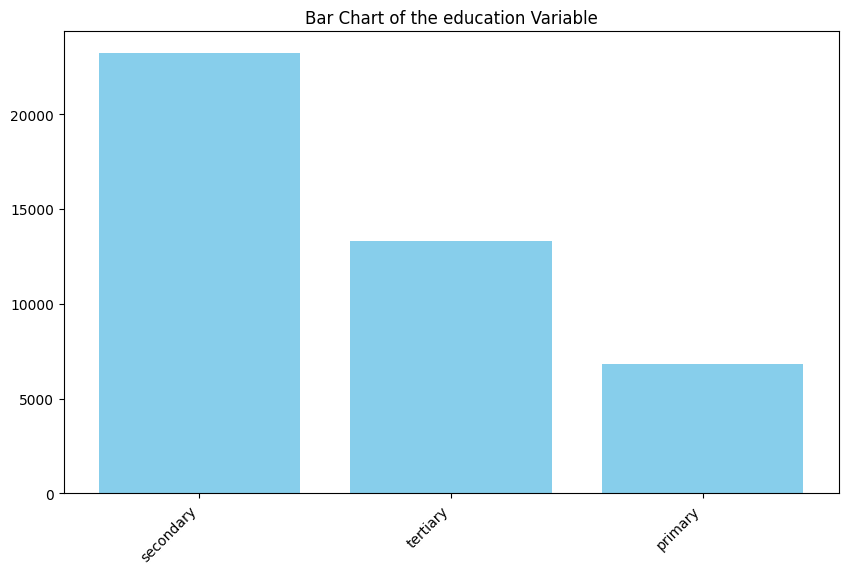

In [306]:
plot_bar_chart(cat_vars, 'education')

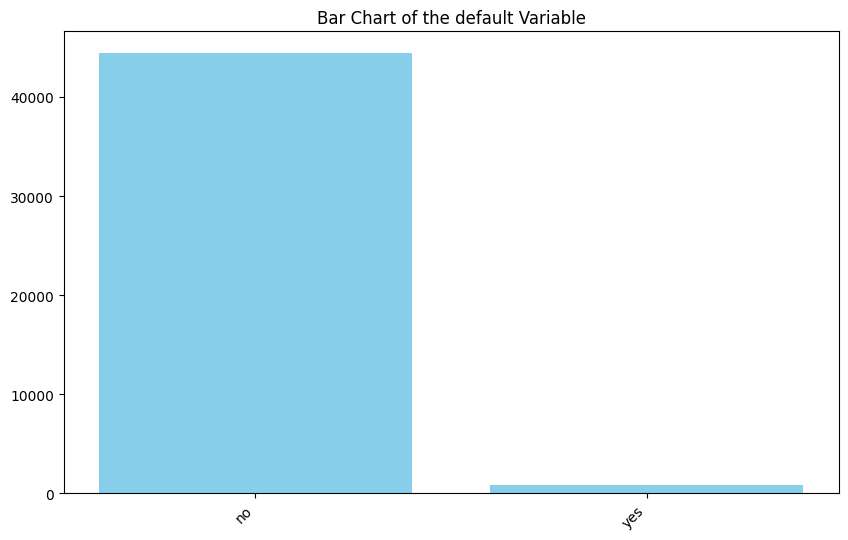

In [307]:
plot_bar_chart(cat_vars, 'default')

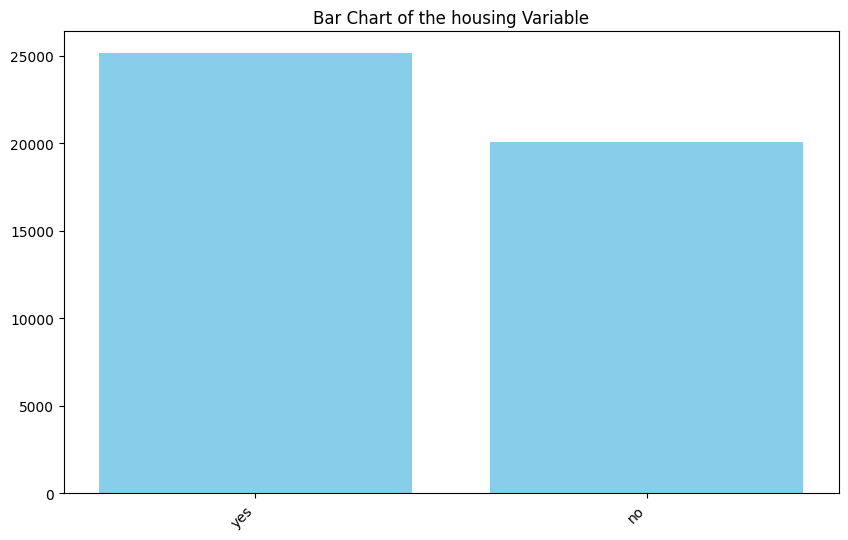

In [308]:
plot_bar_chart(cat_vars, 'housing')

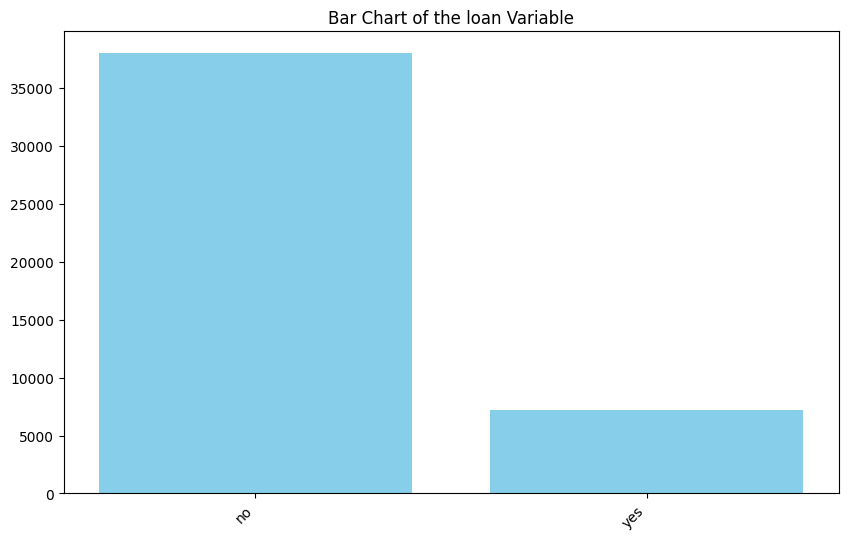

In [309]:
plot_bar_chart(cat_vars, 'loan')

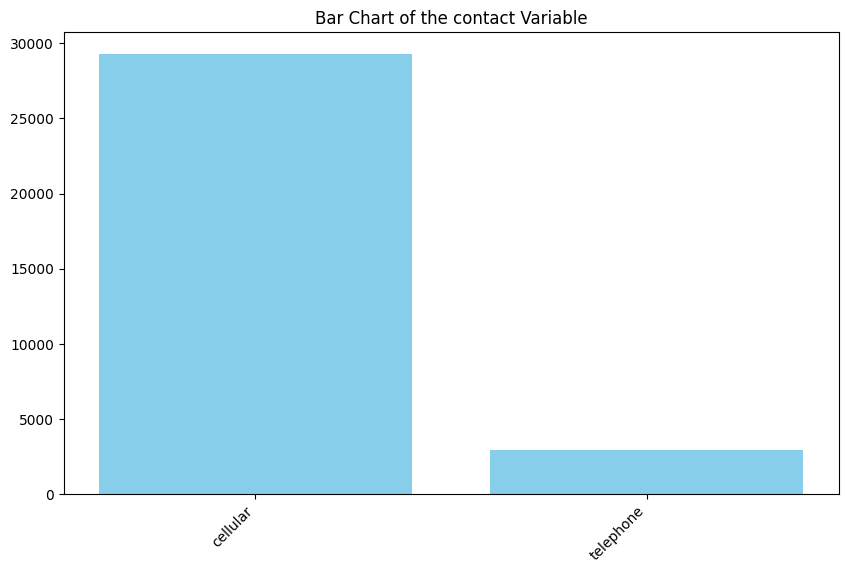

In [310]:
plot_bar_chart(cat_vars, 'contact')

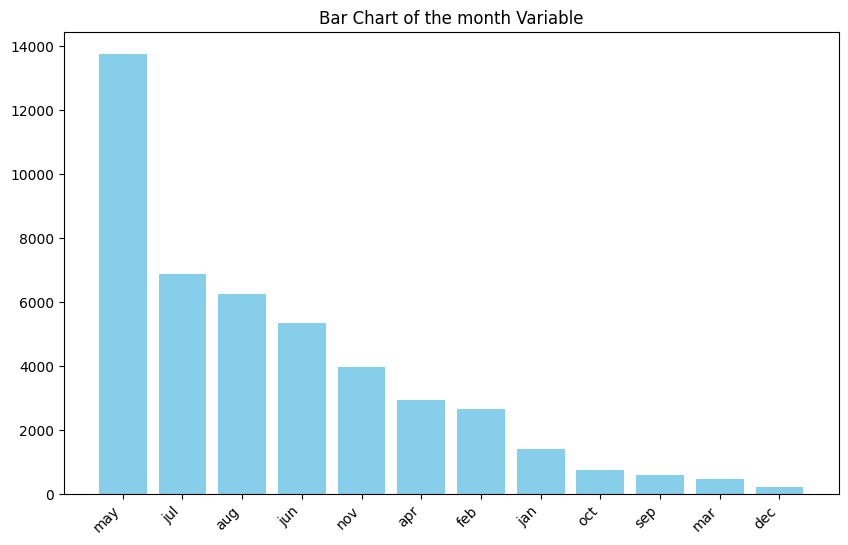

In [311]:
plot_bar_chart(cat_vars, 'month')

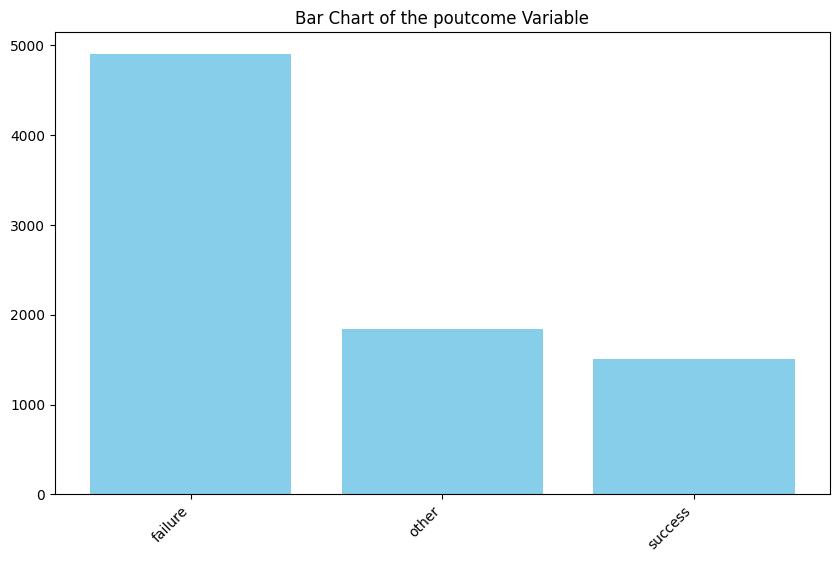

In [312]:
plot_bar_chart(cat_vars, 'poutcome')

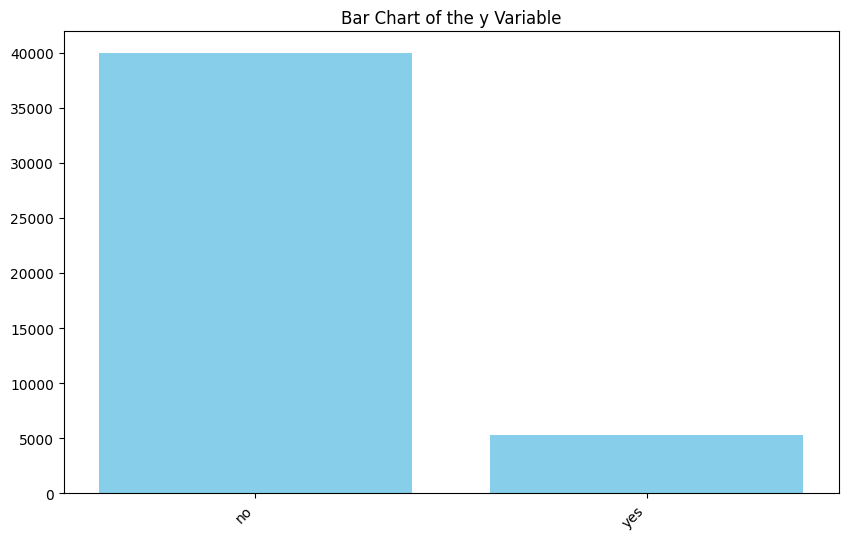

In [313]:
# term deposit
plot_bar_chart(target, 'y')

# Bivariate Analysis

In [314]:
full_df = pd.concat([features, target], axis=1)

### Comparing the categorical variables based on the target variable

In [315]:
def plot_cat_var_by_job(data, group_columns, plot_colors=['red', 'green']):
    """
    Plots the count of a specified column grouped by two other columns in a bar chart.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    group_columns (list): A list of two column names to group the data by.
    count_column (str): The name of the column to count occurrences.
    plot_colors (list): A list of two color names for the bars.
    """
    # Grouping data and counting occurrences
    grouped_counts = data.groupby(group_columns).size().unstack()

    # Plotting
    plt.figure(figsize=(10, 6))
    grouped_counts.plot(kind='bar', stacked=False, color=plot_colors)
    plt.xlabel(group_columns[0])
    plt.ylabel('Count')
    plt.title('Subscription to Term Deposit by Job')
    plt.legend(title='Term Deposit', labels=['No', 'Yes'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

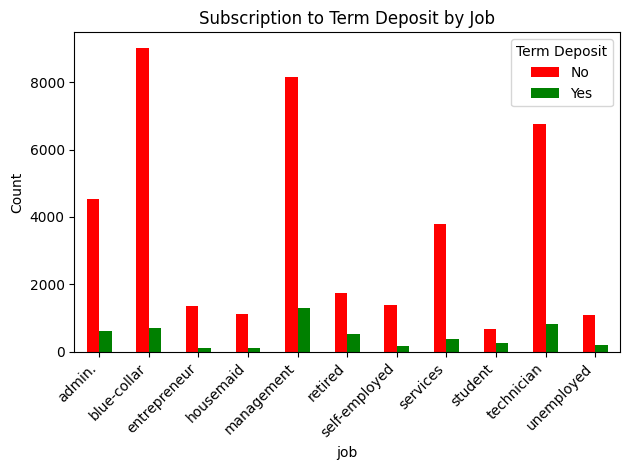

In [316]:
plot_cat_var_by_job(full_df, ['job', 'y'])

<Figure size 1000x600 with 0 Axes>

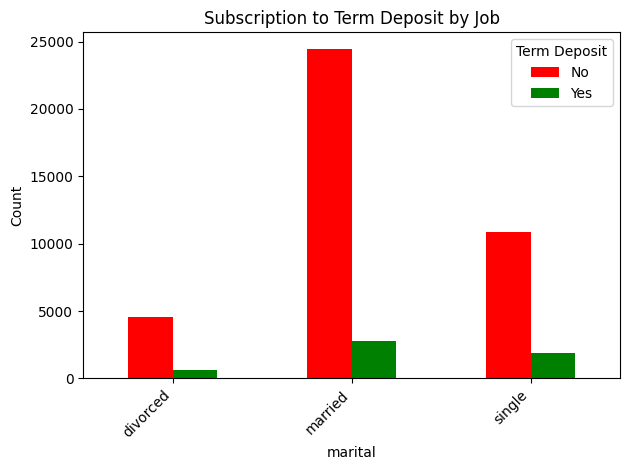

In [317]:
plot_cat_var_by_job(full_df, ['marital', 'y'])

<Figure size 1000x600 with 0 Axes>

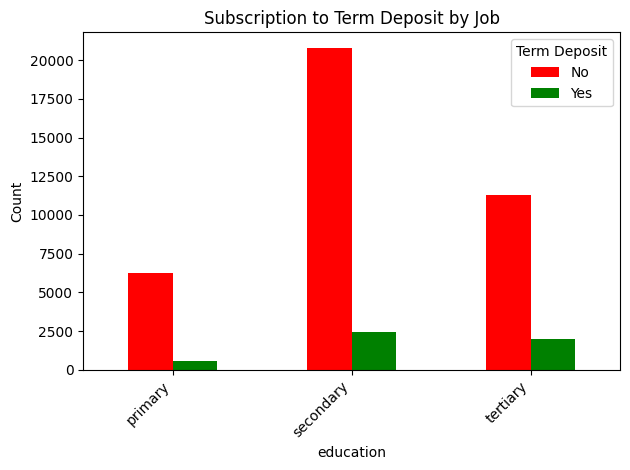

In [318]:
plot_cat_var_by_job(full_df, ['education', 'y'])

<Figure size 1000x600 with 0 Axes>

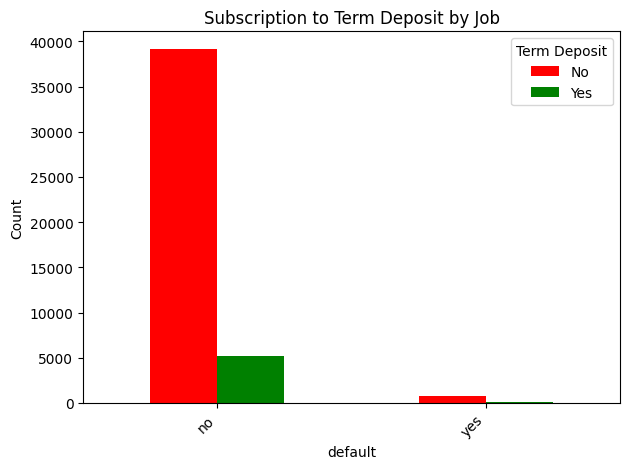

In [319]:
plot_cat_var_by_job(full_df, ['default', 'y'])

<Figure size 1000x600 with 0 Axes>

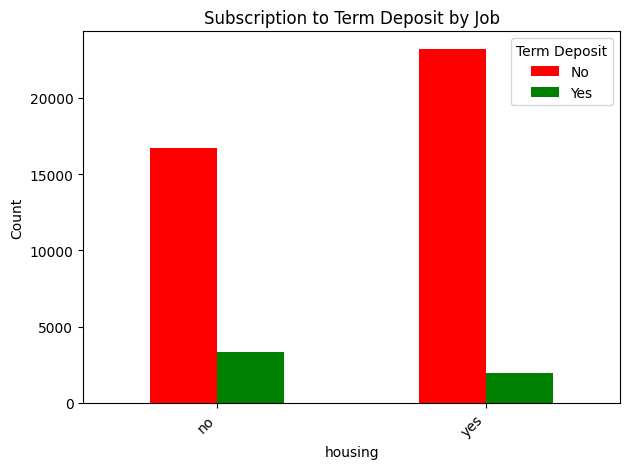

In [320]:
plot_cat_var_by_job(full_df, ['housing', 'y'])

<Figure size 1000x600 with 0 Axes>

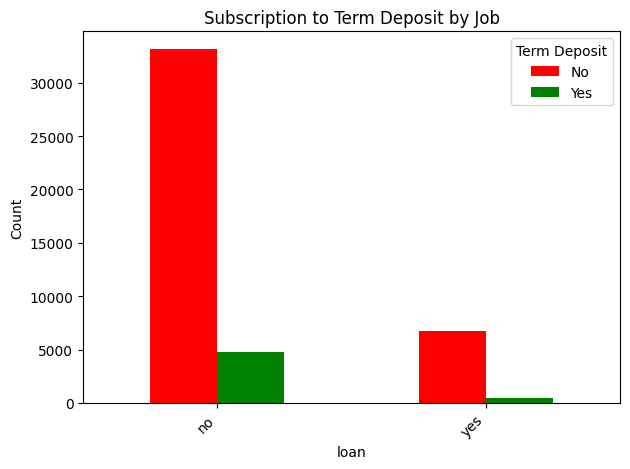

In [321]:
plot_cat_var_by_job(full_df, ['loan', 'y'])

<Figure size 1000x600 with 0 Axes>

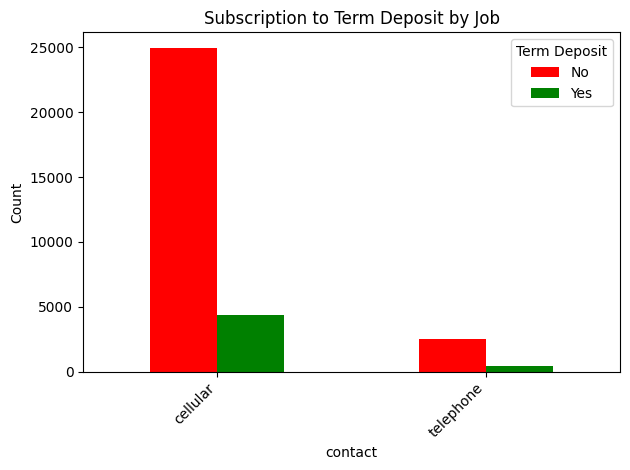

In [322]:
plot_cat_var_by_job(full_df, ['contact', 'y'])

<Figure size 1000x600 with 0 Axes>

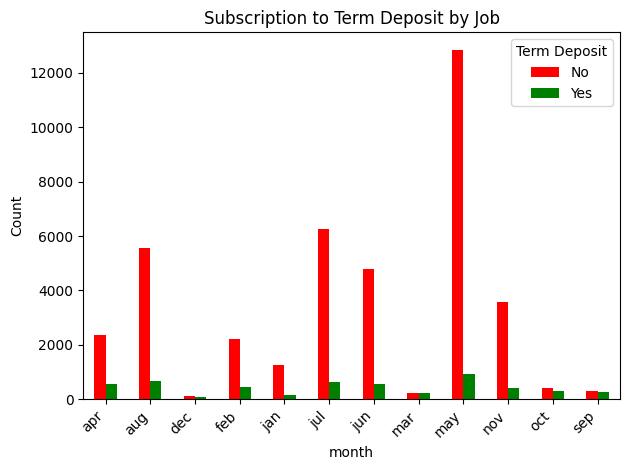

In [323]:
plot_cat_var_by_job(full_df, ['month', 'y'])

<Figure size 1000x600 with 0 Axes>

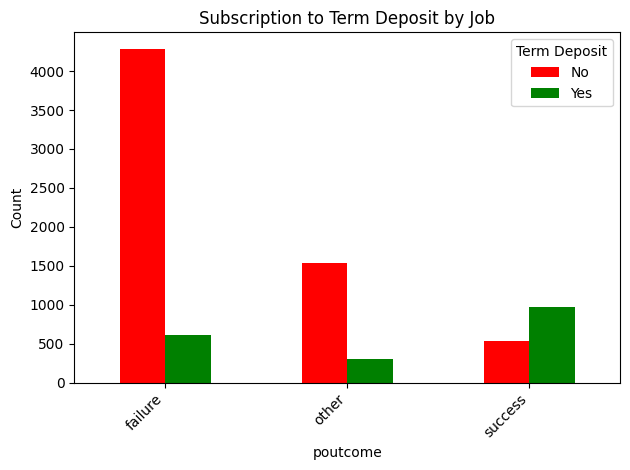

In [324]:
plot_cat_var_by_job(full_df, ['poutcome', 'y'])

### Comparing the numerical variables based on the target variable

In [325]:
def plot_num_var_by_job(data, col, target_col, histogram_bins=10):
    """
    Plots a unified histogram, KDE plot, and box plot for a specified numerical column in a DataFrame,
    differentiated by a categorical target variable using a consistent color scheme.

    This function displays the distribution of a numerical variable, with the data segmented by the categories in the target column.
    It creates three plots:
    1. A histogram showing the frequency distribution of the variable for each target category.
    2. A KDE plot illustrating the data density for each target category.
    3. A box plot providing insights into the variable's quartiles and outliers for each target category.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    col (str): The name of the numerical column to plot.
    target_col (str): The name of the categorical target column to segment the data by.
    histogram_bins (int): The number of bins to use in the histogram. Default is 10.

    The plots use a specific color scheme to distinguish between the categories in the target column.
    'Yes' is represented by blue and 'No' is represented by red.
    """
    colors = {"yes": "blue", "no": "red"}

    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    for category in data[target_col].unique():
        sns.histplot(data[data[target_col] == category][col], bins=histogram_bins, kde=False, color=colors[category], label=str(category))
    plt.title(f'Histogram of {col} by {target_col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    # KDE plot
    plt.subplot(1, 3, 2)
    for category in data[target_col].unique():
        sns.kdeplot(data[data[target_col] == category][col], color=colors[category], fill=True, label=str(category))
    plt.title(f'KDE of {col} by {target_col}')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=col, y=target_col, data=data, orient='h', hue=target_col, palette=colors)
    plt.title(f'Box Plot of {col} by {target_col}')
    plt.xlabel('Value')

    plt.tight_layout()
    plt.show()

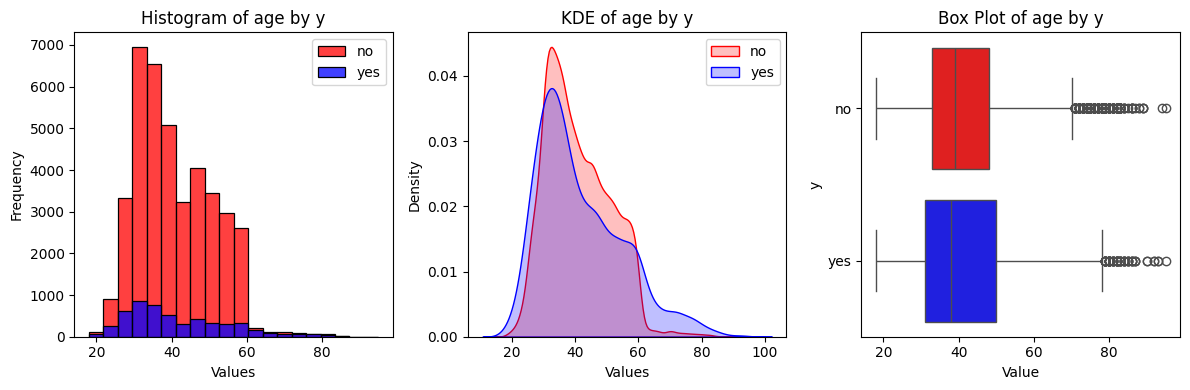

In [334]:
plot_num_var_by_job(full_df, 'age', 'y', histogram_bins=20)

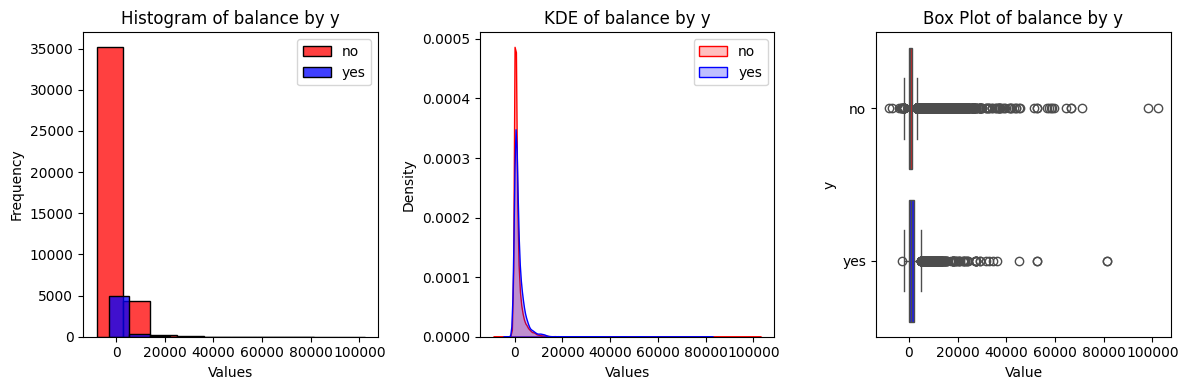

In [327]:
plot_num_var_by_job(full_df, 'balance', 'y')

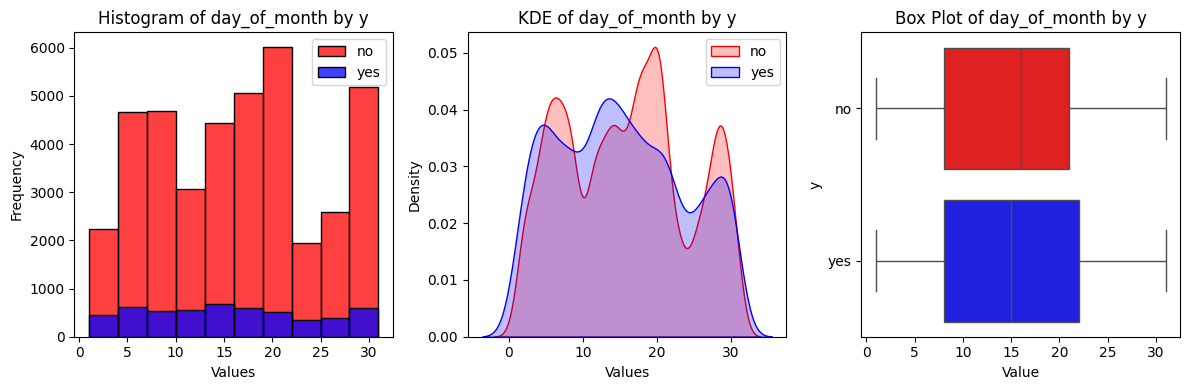

In [328]:
plot_num_var_by_job(full_df, 'day_of_month', 'y')

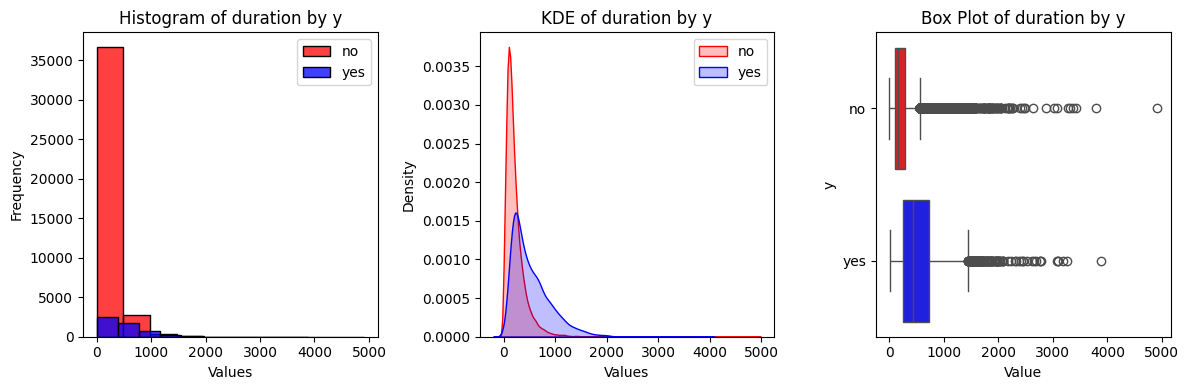

In [329]:
plot_num_var_by_job(full_df, 'duration', 'y')

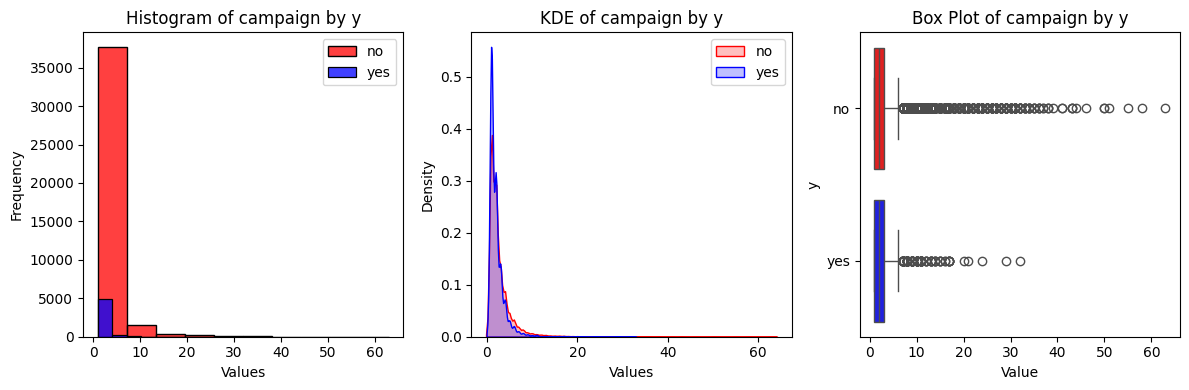

In [331]:
plot_num_var_by_job(full_df, 'campaign', 'y')

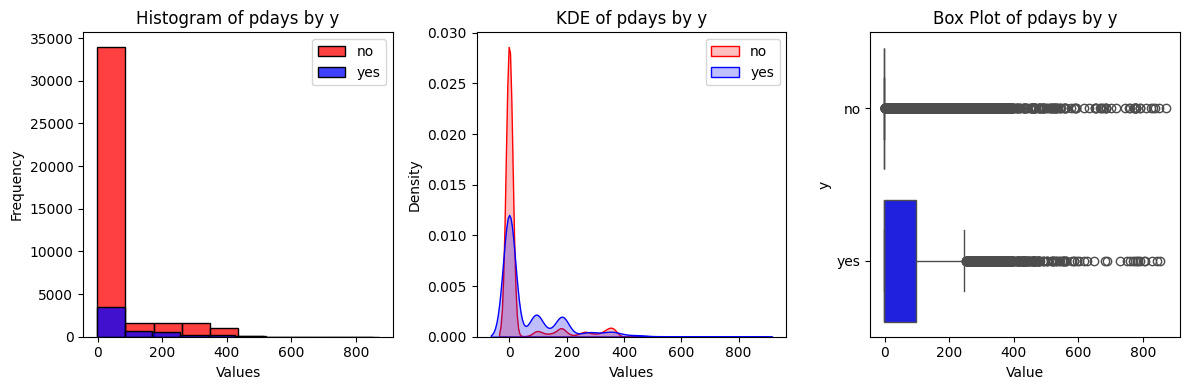

In [332]:
plot_num_var_by_job(full_df, 'pdays', 'y')

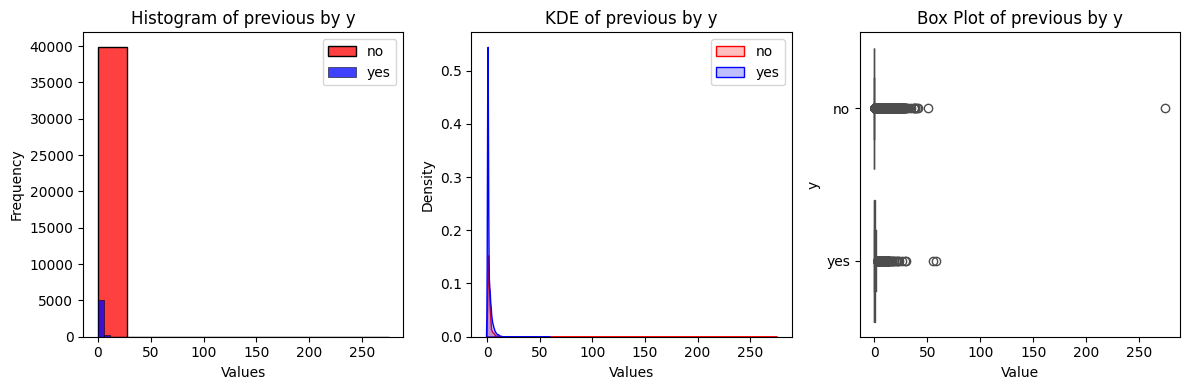

In [333]:
plot_num_var_by_job(full_df, 'previous', 'y')

# Multivariate Analysis

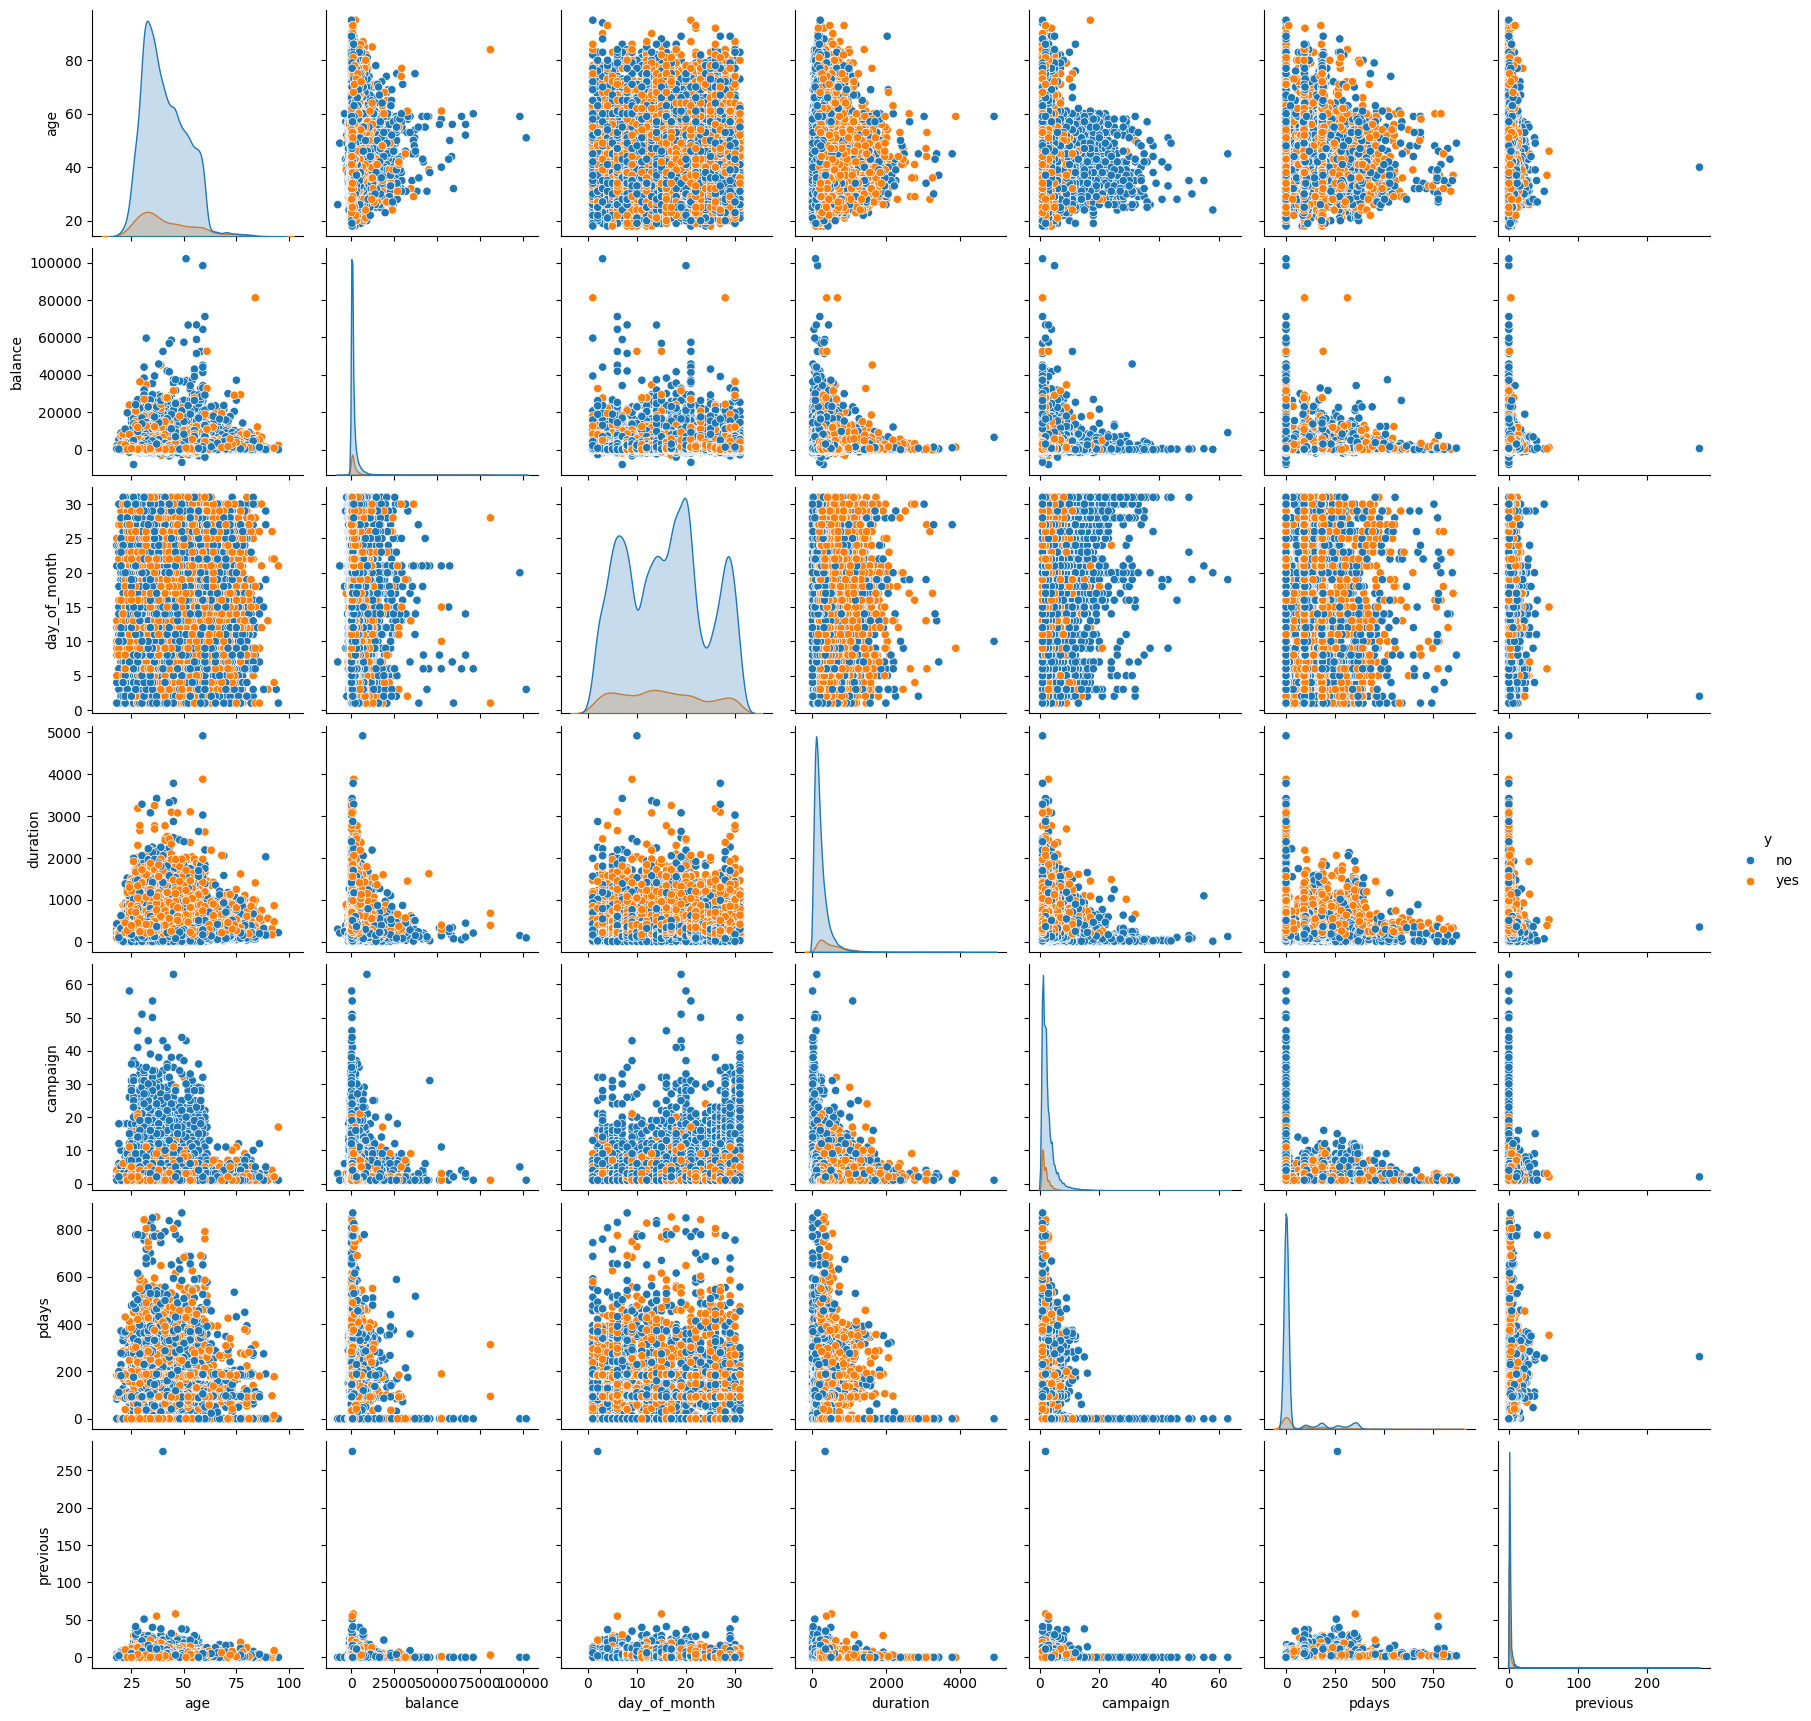

In [338]:
# correlation plot
sns.pairplot(full_df, vars=num_vars.columns, hue='y')

<Axes: >

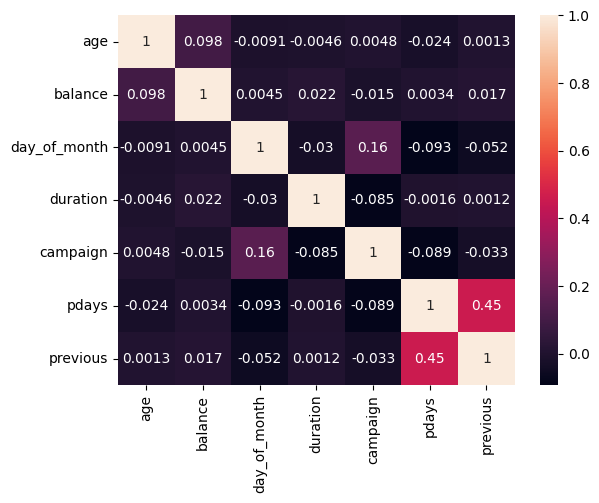

In [339]:
num_vars_corr = num_vars.dropna().corr()
sns.heatmap(num_vars_corr, annot=True)